In [ ]:
!pip install kaggle

In [ ]:
import os

from google.colab import drive

drive.mount('/content/drive')

# Update the existing_kaggle_json path if stored in Drive
existing_kaggle_json = '/content/drive/MyDrive/Colab/Config/kaggle.json'

# Check if the file exists
if os.path.exists(existing_kaggle_json):
    print(f"'kaggle.json' found at {existing_kaggle_json}")
else:
    print(f"'kaggle.json' not found at {existing_kaggle_json}. Please verify the path.")
    # Optionally, list the files in the directory to confirm
    config_dir = '/content/Colab/Config'
    if os.path.exists(config_dir):
        print(f"Contents of {config_dir}:")
        print(os.listdir(config_dir))
    else:
        print(f"The directory {config_dir} does not exist.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'kaggle.json' found at /content/drive/MyDrive/Colab/Config/kaggle.json


In [ ]:
import os
import shutil

# Check if the file exists
if os.path.exists(existing_kaggle_json):
  # Define the destination directory (~/.kaggle)
  kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy(existing_kaggle_json, kaggle_dir)

# Set the permissions to read and write for the user only
kaggle_json_path = os.path.join(kaggle_dir, 'kaggle.json')
os.chmod(kaggle_json_path, 0o600)

print("Kaggle API credentials have been configured successfully.")

Kaggle API credentials have been configured successfully.


In [ ]:
# Download the FER2013 dataset from Kaggle
!kaggle datasets download -d msambare/fer2013

# Unzip the dataset into a folder named 'fer2013'
!unzip fer2013.zip -d fer2013

# Remove the zip file to save space
!rm fer2013.zip

# Verify the contents of the fer2013 directory
import os

for dirname, _, filenames in os.walk('fer2013'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
fer2013/test/sad/PublicTest_23168745.jpg
fer2013/test/sad/PrivateTest_16607046.jpg
fer2013/test/sad/PublicTest_39057061.jpg
fer2013/test/sad/PrivateTest_33171436.jpg
fer2013/test/sad/PublicTest_2906783.jpg
fer2013/test/sad/PrivateTest_80214908.jpg
fer2013/test/sad/PublicTest_59278872.jpg
fer2013/test/sad/PrivateTest_46455102.jpg
fer2013/test/sad/PublicTest_82355488.jpg
fer2013/test/sad/PublicTest_71399421.jpg
fer2013/test/sad/PublicTest_44362743.jpg
fer2013/test/sad/PrivateTest_73181825.jpg
fer2013/test/sad/PublicTest_50942295.jpg
fer2013/test/sad/PrivateTest_77136127.jpg
fer2013/test/sad/PublicTest_80584730.jpg
fer2013/test/sad/PublicTest_88686445.jpg
fer2013/test/sad/PrivateTest_2202708.jpg
fer2013/test/sad/PublicTest_86587530.jpg
fer2013/test/sad/PrivateTest_25972568.jpg
fer2013/test/sad/PrivateTest_66567368.jpg
fer2013/test/sad/PrivateTest_69890745.jpg
fer2013/test/sad/PublicTest_73956240.jpg
fer2013/test/sad/PublicTest_29286867.jp

In [ ]:
import os

# Define the path to the FER2013 dataset
fer2013_path = 'fer2013'

# Traverse the directory and print the structure
for root, dirs, files in os.walk(fer2013_path):
    level = root.replace(fer2013_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  # Print first 5 files in each directory
        print(f"{subindent}{f}")

fer2013/
    train/
        disgust/
            Training_38088257.jpg
            Training_76822401.jpg
            Training_86653280.jpg
            Training_12950225.jpg
            Training_52627293.jpg
        angry/
            Training_26143246.jpg
            Training_92529003.jpg
            Training_58757567.jpg
            Training_67667183.jpg
            Training_81857252.jpg
        sad/
            Training_78373088.jpg
            Training_2524793.jpg
            Training_55520127.jpg
            Training_61502973.jpg
            Training_91369145.jpg
        fear/
            Training_62258157.jpg
            Training_91782114.jpg
            Training_21305817.jpg
            Training_90813066.jpg
            Training_24058572.jpg
        happy/
            Training_73712000.jpg
            Training_10209551.jpg
            Training_93059094.jpg
            Training_49735582.jpg
            Training_40227678.jpg
        neutral/
            Training_15890804.jpg
      

In [ ]:
!pip install torch torchvision torchaudio
!pip install efficientnet_pytorch
!pip install scikit-learn matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=85047e31ad7df8ad4f21bfe2bdea6038faa6c78f683811caf1b1a7dba636d132
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [ ]:
# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet means
                         std=[0.229, 0.224, 0.225])   # ImageNet stds
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# Define the path to the dataset
fer2013_path = 'fer2013'

# Create datasets
train_dataset_full = datasets.ImageFolder(root=os.path.join(fer2013_path, 'train'), transform=train_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(fer2013_path, 'test'), transform=val_test_transform)

print(f"Number of training samples (full): {len(train_dataset_full)}")
print(f"Number of test samples: {len(test_dataset)}")


Number of training samples (full): 28709
Number of test samples: 7178


In [ ]:
# Define the split sizes
train_size = int(0.8 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size

# Split the dataset
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")


Number of training samples: 22967
Number of validation samples: 5742
Number of test samples: 7178


Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


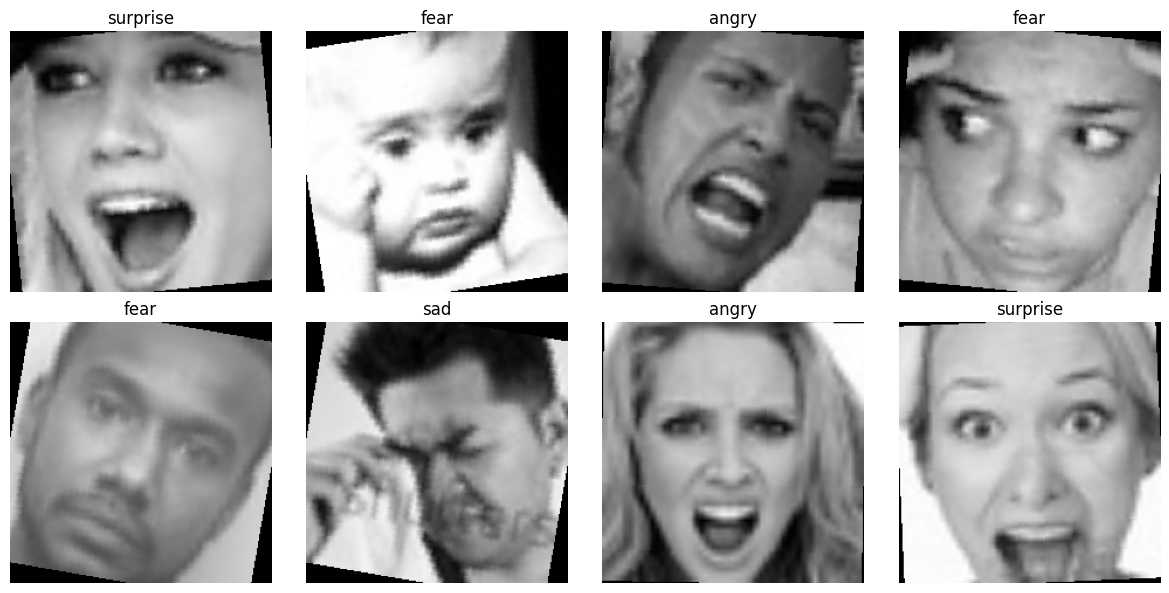

In [ ]:
# Get class names directly from the ImageFolder instance
class_names = train_dataset_full.classes
print("Classes:", class_names)

def imshow_grid_dynamic(images, labels, class_names, cols=4):
    """
    Displays a grid of images with their corresponding labels.

    Args:
        images (Tensor): Batch of images.
        labels (Tensor): Corresponding labels for the images.
        class_names (list): List of class names.
        cols (int): Number of columns in the grid.
    """
    batch_size = images.size(0)
    rows = batch_size // cols + int(batch_size % cols != 0)

    plt.figure(figsize=(cols * 3, rows * 3))
    for i in range(batch_size):
        ax = plt.subplot(rows, cols, i + 1)
        img = images[i].cpu().numpy().transpose((1, 2, 0))
        # Unnormalize the image
        img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                     np.array([0.485, 0.456, 0.406]), 0, 1)
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of training data
train_loader_temp = DataLoader(train_dataset, batch_size=8, shuffle=True)
images, labels = next(iter(train_loader_temp))

# Visualize the grid of images
imshow_grid_dynamic(images, labels, class_names, cols=4)


In [ ]:
# Define DataLoaders with optimized num_workers
batch_size = 64
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

print("DataLoaders optimized with increased num_workers and pin_memory.")


DataLoaders created successfully.


In [ ]:
class FER2013Model(nn.Module):
    def __init__(self, num_classes=7, pretrained=True):
        super(FER2013Model, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0') if pretrained else EfficientNet.from_name('efficientnet-b0')
        # Replace the classifier
        in_features = self.model._fc.in_features
        self.model._fc = nn.Sequential(
            nn.Dropout(p=0.4),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model
model = FER2013Model(num_classes=7, pretrained=True)
model = model.to(device)

print(model)

Using device: cuda


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 167MB/s]


Loaded pretrained weights for efficientnet-b0
FER2013Model(
  (model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
   

In [ ]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer - only parameters of the final layer are being optimized initially
optimizer = optim.Adam(model.model._fc.parameters(), lr=1e-3)

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


In [ ]:
num_epochs = 20
best_val_acc = 0.0

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}")

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print("Best model saved.")


Epoch [1/20] Train Loss: 1.6739 Train Acc: 0.3350 Val Loss: 1.6058 Val Acc: 0.3769
Best model saved.
Epoch [2/20] Train Loss: 1.5937 Train Acc: 0.3796 Val Loss: 1.5844 Val Acc: 0.4044
Best model saved.
Epoch [3/20] Train Loss: 1.5838 Train Acc: 0.3815 Val Loss: 1.5290 Val Acc: 0.4239
Best model saved.
Epoch [4/20] Train Loss: 1.5808 Train Acc: 0.3833 Val Loss: 1.4950 Val Acc: 0.4281
Best model saved.
Epoch [5/20] Train Loss: 1.5778 Train Acc: 0.3869 Val Loss: 1.5066 Val Acc: 0.4319
Best model saved.
Epoch [6/20] Train Loss: 1.5684 Train Acc: 0.3872 Val Loss: 1.5046 Val Acc: 0.4255
Epoch [7/20] Train Loss: 1.5791 Train Acc: 0.3839 Val Loss: 1.4880 Val Acc: 0.4349
Best model saved.
Epoch [8/20] Train Loss: 1.5748 Train Acc: 0.3869 Val Loss: 1.4818 Val Acc: 0.4340
Epoch [9/20] Train Loss: 1.5695 Train Acc: 0.3903 Val Loss: 1.5076 Val Acc: 0.4270
Epoch [10/20] Train Loss: 1.5687 Train Acc: 0.3895 Val Loss: 1.4980 Val Acc: 0.4289
Epoch [11/20] Train Loss: 1.5689 Train Acc: 0.3903 Val Loss: 

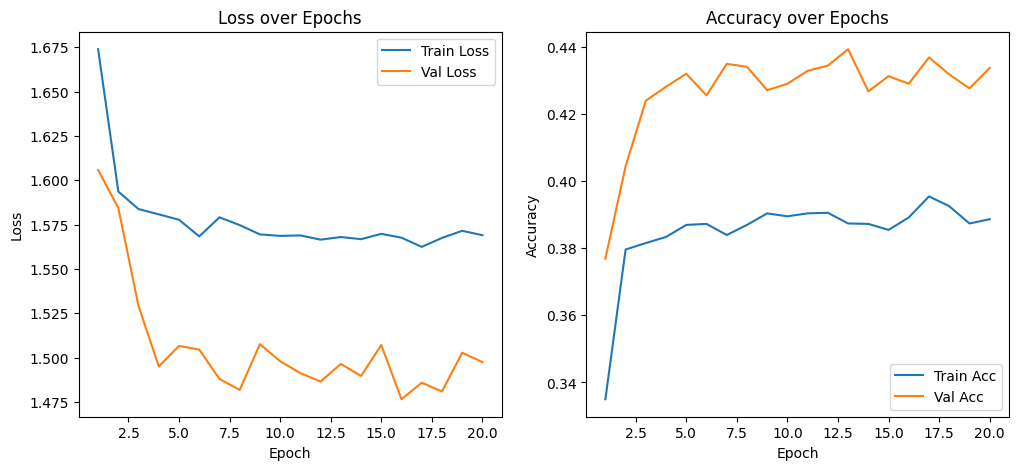

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Acc')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Unfreeze all layers
for param in model.model.parameters():
    param.requires_grad = True

# Alternatively, freeze all layers except the last few
# Example: Freeze all layers except the last 20
# for name, param in model.model.named_parameters():
#     if 'blocks.6' not in name and 'blocks.7' not in name:
#         param.requires_grad = False


In [ ]:
# Define a new optimizer with a lower learning rate
optimizer = optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
fine_tune_epochs = 10
total_epochs = num_epochs + fine_tune_epochs

for epoch in range(num_epochs, total_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{total_epochs}] "
          f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}")

    # Save the best fine-tuned model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model_finetuned.pth')
        print("Best fine-tuned model saved.")


Epoch [21/30] Train Loss: 1.5050 Train Acc: 0.4229 Val Loss: 1.3814 Val Acc: 0.4770
Best fine-tuned model saved.
Epoch [22/30] Train Loss: 1.4159 Train Acc: 0.4588 Val Loss: 1.3194 Val Acc: 0.5033
Best fine-tuned model saved.
Epoch [23/30] Train Loss: 1.3551 Train Acc: 0.4827 Val Loss: 1.2637 Val Acc: 0.5237
Best fine-tuned model saved.
Epoch [24/30] Train Loss: 1.3104 Train Acc: 0.5020 Val Loss: 1.2377 Val Acc: 0.5359
Best fine-tuned model saved.
Epoch [25/30] Train Loss: 1.2715 Train Acc: 0.5153 Val Loss: 1.2014 Val Acc: 0.5522
Best fine-tuned model saved.
Epoch [26/30] Train Loss: 1.2323 Train Acc: 0.5325 Val Loss: 1.1746 Val Acc: 0.5618
Best fine-tuned model saved.
Epoch [27/30] Train Loss: 1.2010 Train Acc: 0.5468 Val Loss: 1.1513 Val Acc: 0.5718
Best fine-tuned model saved.
Epoch [28/30] Train Loss: 1.1707 Train Acc: 0.5552 Val Loss: 1.1266 Val Acc: 0.5759
Best fine-tuned model saved.
Epoch [29/30] Train Loss: 1.1513 Train Acc: 0.5639 Val Loss: 1.1029 Val Acc: 0.5834
Best fine-tu

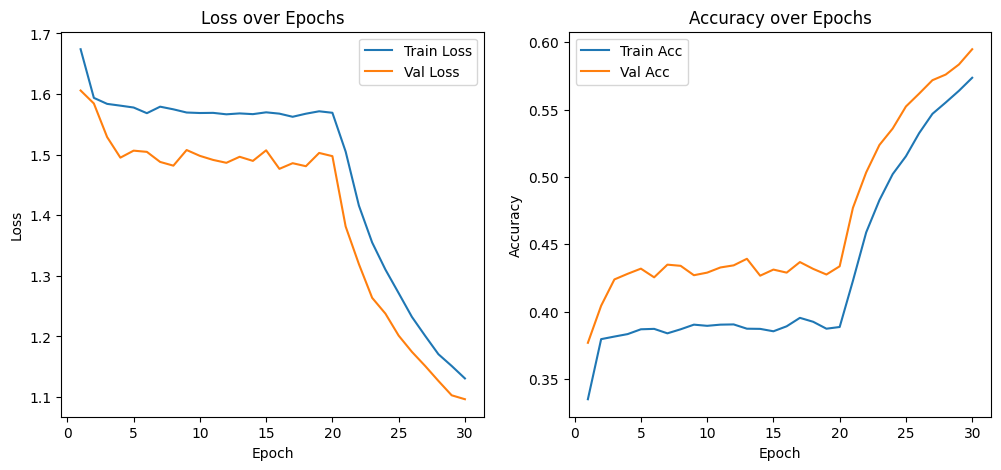

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, total_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, total_epochs+1), val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, total_epochs+1), train_accuracies, label='Train Acc')
plt.plot(range(1, total_epochs+1), val_accuracies, label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Initialize the model architecture
model = FER2013Model(num_classes=7)
model.load_state_dict(torch.load('best_model_finetuned.pth'))
model = model.to(device)
model.eval()

print("Best fine-tuned model loaded successfully.")


Loaded pretrained weights for efficientnet-b0
Best fine-tuned model loaded successfully.


<ipython-input-28-4c6c4ac7d7dc>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_finetuned.pth'))


In [ ]:
def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    loss = running_loss / total
    acc = correct / total
    return loss, acc, all_preds, all_labels

In [ ]:
test_loss, test_acc, all_preds, all_labels = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f} Test Accuracy: {test_acc:.4f}")

Test Loss: 1.1107 Test Accuracy: 0.5762


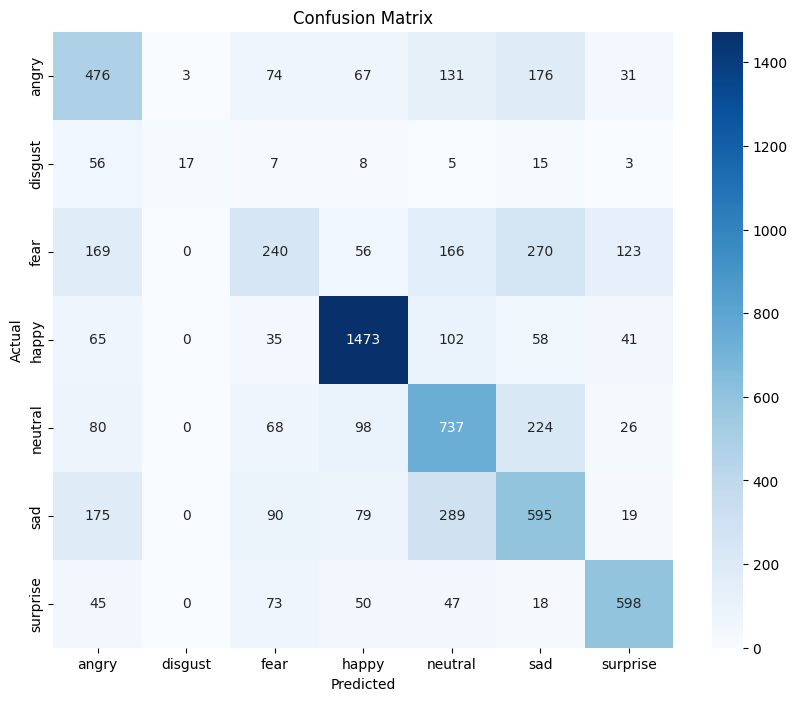

Classification Report:
               precision    recall  f1-score   support

       angry       0.45      0.50      0.47       958
     disgust       0.85      0.15      0.26       111
        fear       0.41      0.23      0.30      1024
       happy       0.80      0.83      0.82      1774
     neutral       0.50      0.60      0.54      1233
         sad       0.44      0.48      0.46      1247
    surprise       0.71      0.72      0.72       831

    accuracy                           0.58      7178
   macro avg       0.59      0.50      0.51      7178
weighted avg       0.57      0.58      0.57      7178



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(all_labels, all_preds, target_names=class_names)
print("Classification Report:\n", report)

In [ ]:
# Define the save path in Google Drive
save_path = '/content/drive/MyDrive/FER2013/best_model_finetuned.pth'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the model
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to /content/drive/MyDrive/FER2013/best_model_finetuned.pth


In [ ]:
from google.colab import files

# Download the model
files.download('best_model_finetuned.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>